# Practica 3
## Integrantes
Iker Antonio Pluma Amaro
### Librerias

In [73]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Desarollo
Clases

In [74]:
from typing import Dict, Optional

class UnionFind:
    def __init__(self):
        self.__body: Dict[int, int] = {}

    def __str__(self) -> str:
        components = {}
        for x in self.__body:
            root = self.find(x)
            if root in components:
                components[root].append(x)
            else:
                components[root] = [x]
        output = ""
        for root, items in components.items():
            output += f"Component {root}: {', '.join(map(str, items))}\n"
        return output

    def find(self, x: int) -> Optional[int]:
        if x not in self.__body:
            return None
        if self.__body[x] != x:
            self.__body[x] = self.find(self.__body[x])
        return self.__body[x]

    def union(self, x: int, y: int) -> None:
        root_x = self.find(x)
        root_y = self.find(y)
        if root_x is None or root_y is None:
            return
        if root_x != root_y:
            self.__body[root_y] = root_x

    def makeSet(self, x: int) -> None:
        if x not in self.__body:
            self.__body[x] = x


Funciones

In [75]:
def segmentation(Image: np.ndarray) -> np.ndarray:
    uf = UnionFind()
    xAxisSize, yAxisSize = Image.shape
    newArray = np.zeros([xAxisSize, yAxisSize], dtype=int)
    cont = 1

    for x in range(1, xAxisSize):
        for y in range(1, yAxisSize):
            if Image[x][y] == 255:
                neighbors = []
                if newArray[x - 1][y] != 0:
                    neighbors.append(newArray[x - 1][y])
                if newArray[x - 1][y - 1] != 0:
                    neighbors.append(newArray[x - 1][y - 1])
                if newArray[x][y - 1] != 0:
                    neighbors.append(newArray[x][y - 1])
                if y < yAxisSize - 1 and newArray[x - 1][y + 1] != 0:
                    neighbors.append(newArray[x - 1][y + 1])

                if not neighbors:
                    newArray[x][y] = cont
                    cont += 1
                else:
                    min_neighbor = min(neighbors)
                    newArray[x][y] = min_neighbor

                    for neighbor in neighbors:
                        if newArray[x][y] != neighbor:
                            uf.makeSet(neighbor)
                            uf.makeSet(min_neighbor)
                            uf.union(neighbor, min_neighbor)

    for x in range(xAxisSize):
        for y in range(yAxisSize):
            if Image[x][y] == 255:
                value = uf.find(newArray[x][y])
                if value is not None:
                    newArray[x][y] = value
    print(uf)
    return newArray

### Ejecución
Lectura de la imagen

In [76]:
img = cv.imread('bordes.png',cv.IMREAD_GRAYSCALE)
_,img = cv.threshold(img,15,255,cv.THRESH_BINARY)

Ploteo de la imagen

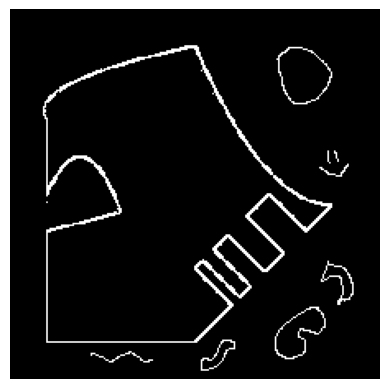

In [77]:
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.show()

Component 56: 2, 1, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 37, 36, 43, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 40, 53, 56, 55, 54
Component 33: 7, 3, 32, 33
Component 39: 39, 38
Component 58: 58, 57
Component 75: 60, 59, 61, 62, 63, 64, 65, 73, 75
Component 80: 67, 66, 68, 76, 79, 80
Component 78: 71, 69, 72, 74, 77, 70, 78



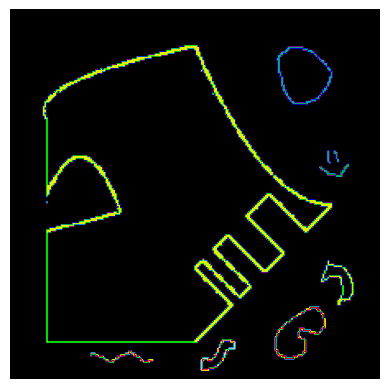

In [78]:
plt.imshow(segmentation(img),cmap="nipy_spectral")
plt.axis("off")
plt.show()